In [15]:
import rdkit
from rdkit import Chem
from rdkit import IPythonConsole
from matplotlib.colors import ColorConverter

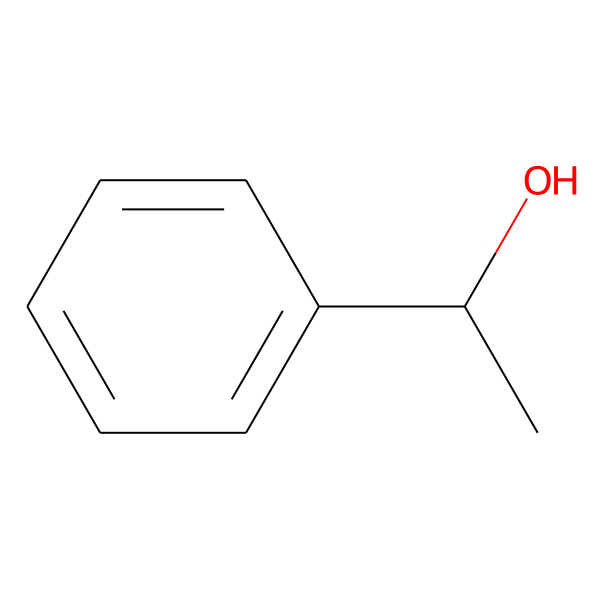

In [2]:
m = Chem.MolFromSmiles('CC(O)c1ccccc1')
rdkit.Chem.Draw.MolToImage(m,size=(600,600))

In [3]:
a = m.GetAtomWithIdx(1)

In [4]:
a.GetBonds()

(<rdkit.Chem.rdchem.Bond at 0x18c3b3d3e90>,
 <rdkit.Chem.rdchem.Bond at 0x18c3b3da170>)

In [124]:
params = Chem.SmilesParserParams()
params.removeHs = False
alcohol = Chem.MolFromSmiles('C([OH])',params)
matches = m.GetSubstructMatches(alcohol)

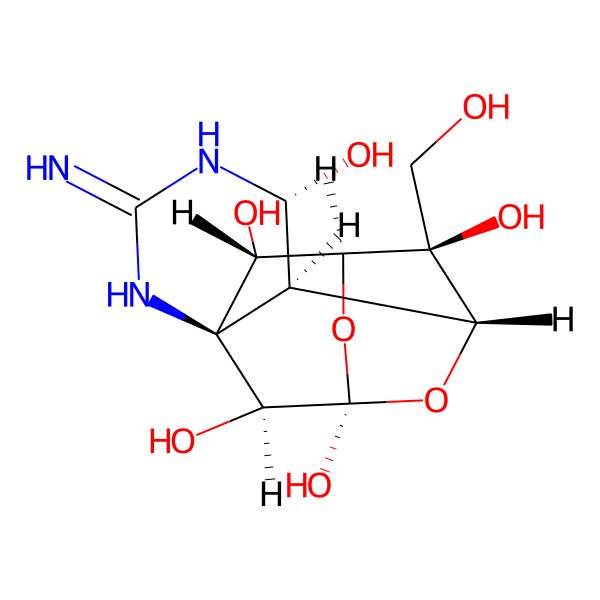

In [98]:
tetrodotoxin = Chem.MolFromSmiles('O1[C@@H]4[C@@](O)([C@@H]3O[C@@]1(O)[C@@H](O)[C@]2(N\C(N/[C@H](O)[C@H]23)=N)[C@@H]4O)CO',params)
matches = []
for entry in tetrodotoxin.GetSubstructMatches(alcohol):
    if entry not in tetrodotoxin.GetSubstructMatches(Chem.MolFromSmiles('COC')):
        matches.append(entry)
rdkit.Chem.Draw.MolToImage(tetrodotoxin,size=(600,600))


In [99]:
matchAtoms = []
for entry in matches:
    bond = tetrodotoxin.GetBondBetweenAtoms(entry[0],entry[1])
    matchAtoms.append(bond.GetIdx())

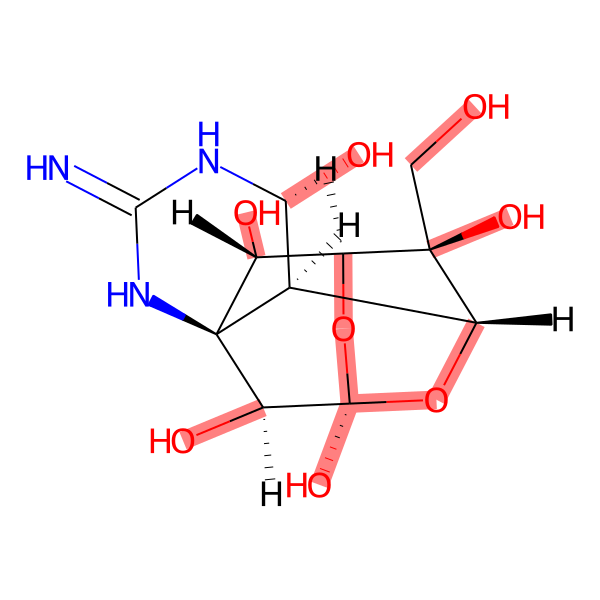

In [100]:
rdkit.Chem.Draw.MolToImage(tetrodotoxin,size=(600,600),highlightBonds=matchAtoms)

In [33]:
b = m.GetBondBetweenAtoms(1,2)

1 2


In [79]:
tetrodotoxin.GetSubstructMatches(alcohol)

((1, 0),
 (2, 3),
 (4, 5),
 (6, 5),
 (6, 7),
 (6, 0),
 (8, 9),
 (14, 15),
 (18, 19),
 (20, 21))

In [101]:
for at in alcohol.GetAtoms():
    print(at.GetSymbol())

C
O


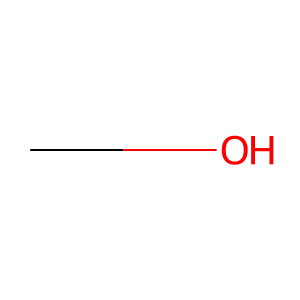

In [87]:
rdkit.Chem.Draw.MolToImage(alcohol)

In [119]:
params

In [112]:
import inspect
inspect.getfullargspec(inspect.getsource(Chem.MolFromSmiles))

TypeError: module, class, method, function, traceback, frame, or code object was expected, got function

In [118]:
inspect.getargspec(Chem.MolFromSmiles)

C:\ProgramData\Anaconda3\envs\rdkit-env\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()
  """Entry point for launching an IPython kernel.


TypeError: unsupported callable